In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_theme()
plt.rcParams['figure.figsize'] = [8,8]

In [4]:
africa = pd.read_csv("africa.csv")
n_countries = len( africa )
n_countries

47

In [5]:
africa

,Country,Literacy,IMR
0,Algeria,89,26
1,Angola,66,96
2,Benin,45,68
3,Botswana,97,20
4,Burkina Faso,33,82
5,Burundi,78,86
6,Cameroon,77,79
7,Cape Verde,99,18
8,Central African Republic,58,108
9,Chad,41,97


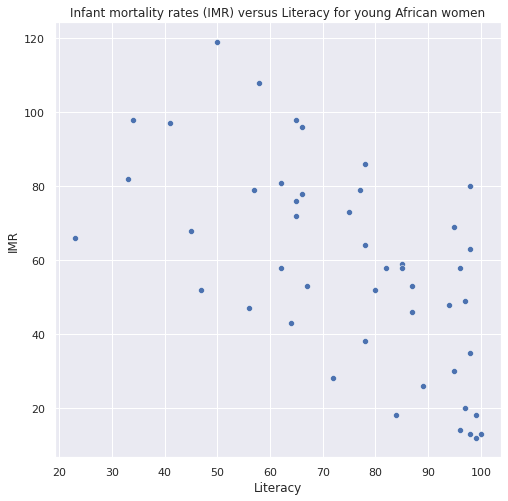

In [6]:
sns.scatterplot(data=africa, x="Literacy", y="IMR")
plt.title("Infant mortality rates (IMR) versus Literacy for young African women")
plt.savefig("literacy_imr.png")

In [7]:
x_bar = africa.Literacy.mean()
x_bar

74.95744680851064

In [8]:
y_bar = africa.IMR.mean()
y_bar

58.1063829787234

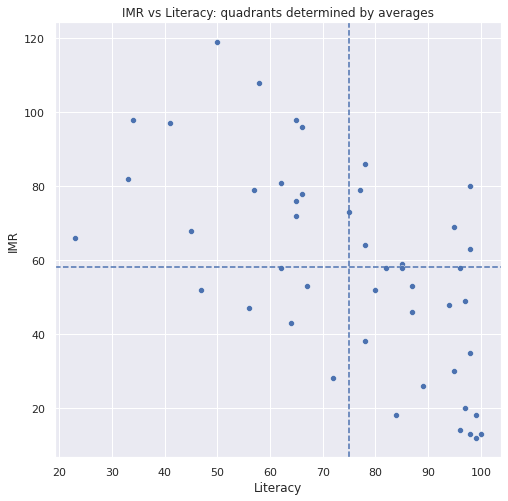

In [9]:
sns.scatterplot(data=africa, x="Literacy", y="IMR")
plt.axvline( x_bar, linestyle='--')
plt.axhline( y_bar, linestyle='--')
plt.title("IMR vs Literacy: quadrants determined by averages")
plt.savefig("quadrants.png")

In [10]:
africa_corr = africa.Literacy.corr( africa.IMR )
africa_corr

-0.616221949960677

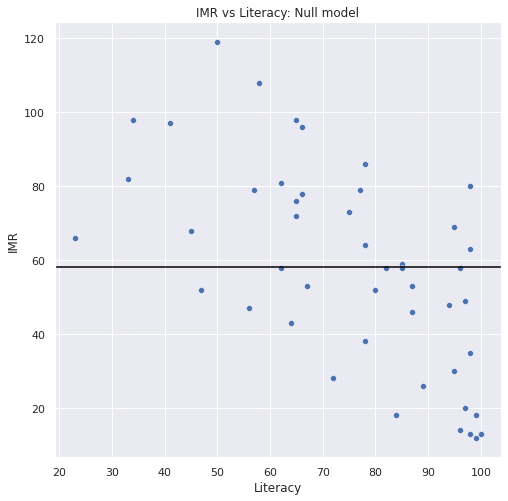

In [11]:
sns.scatterplot(data=africa, x="Literacy", y="IMR")
# null model:
plt.axhline( y_bar, color="black")
plt.title("IMR vs Literacy: Null model")
plt.savefig("africa_null.png")

In [12]:
africa_tss = ((africa.IMR - y_bar)**2).sum()
africa_tss

34308.46808510638

In [13]:
africa.IMR.var()

745.836262719704

In [14]:
(n_countries - 1)*africa.IMR.var()

34308.46808510638

In [15]:
s_x = africa.Literacy.std()
s_x

20.512941245879194

In [16]:
s_y = africa.IMR.std()
s_y

27.31000297912294

In [17]:
m_sd = -s_y / s_x 
m_sd

-1.3313548092285008

In [18]:
b_sd = y_bar - m_sd*x_bar
b_sd

157.90134027472357

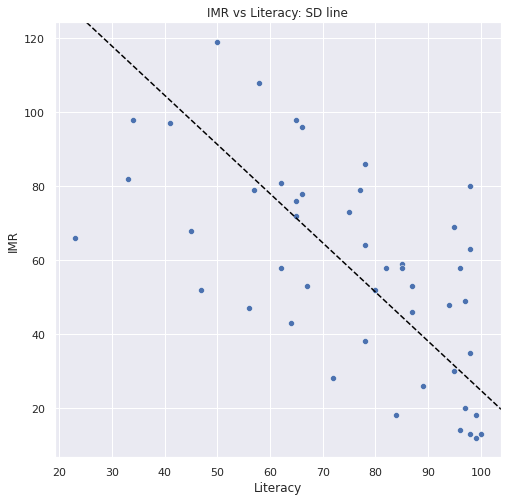

In [19]:
sns.scatterplot(data=africa, x="Literacy", y="IMR")
# SD line
plt.axline( (x_bar, y_bar), slope = m_sd, linestyle='--', color="black")
plt.title("IMR vs Literacy: SD line")
plt.savefig("literacy_imr_sdline.png")

In [20]:
# africa = africa.assign( null_resid = africa.IMR - y_bar, sd_pred = b_sd + m_sd*africa.Literacy, sd_resid = africa.IMR - b_sd - m_sd*africa.Literacy)

In [21]:
m = africa_corr*(s_y/s_x)
m

-0.8204100566323119

In [22]:
b = y_bar - m*x_bar
b

119.60222615990713

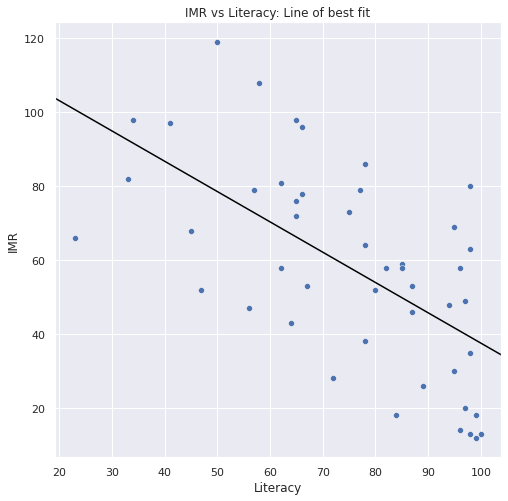

In [23]:
sns.scatterplot(data=africa, x="Literacy", y="IMR")
# line of best fit
plt.axline( (x_bar,y_bar), slope = m, color="black")
plt.title("IMR vs Literacy: Line of best fit")
plt.savefig("literacy_imr_regression_line.png")

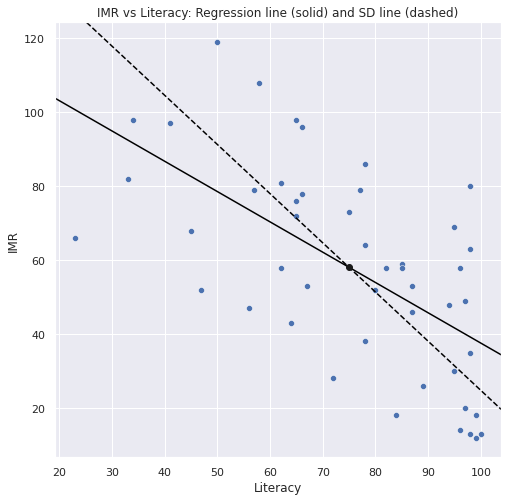

In [24]:
sns.scatterplot(data=africa, x="Literacy", y="IMR")
plt.axline( (x_bar,y_bar), slope = m, color="black")
plt.axline( (x_bar, y_bar), slope = m_sd, linestyle='--', color="black")
plt.title("IMR vs Literacy: Regression line (solid) and SD line (dashed)")
plt.plot(x_bar,y_bar,'ok')
plt.savefig("literacy_imr_both_lines.png")

In [25]:
africa_model = smf.ols('IMR ~ Literacy', data = africa)

In [26]:
africa_fit = africa_model.fit()

In [27]:
africa_fit.params

Intercept    119.602226
Literacy      -0.820410
dtype: float64

In [28]:
africa_null = smf.ols('IMR ~ 1', data = africa)

In [29]:
africa_null = africa_null.fit()

In [30]:
africa_null.params

Intercept    58.106383
dtype: float64

In [31]:
print( africa_fit.summary() )

                            OLS Regression Results                            
Dep. Variable:                    IMR   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     27.55
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           4.00e-06
Time:                        15:46:56   Log-Likelihood:                -210.40
No. Observations:                  47   AIC:                             424.8
Df Residuals:                      45   BIC:                             428.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    119.6022     12.138      9.853      0.0

In [32]:
africa_ssr = (africa_fit.resid**2).sum()
africa_ssr

21280.530941116467

In [33]:
africa_fit.ssr

21280.530941116467

In [34]:
africa_ssr / (n_countries - 2)

472.9006875803659

In [35]:
np.sqrt( africa_ssr / (n_countries - 2) )

21.746279856112537

In [36]:
africa_fit.scale

472.9006875803659

In [37]:
africa_rse = np.sqrt( africa_fit.scale )
africa_rse

21.746279856112537

In [38]:
africa_fit.rsquared

0.379729491613339

In [39]:
1 - (africa_ssr / africa_tss)

0.379729491613339

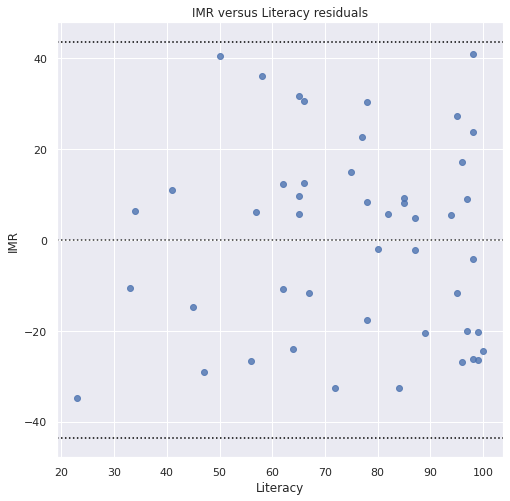

In [40]:
sns.residplot(data=africa, x="Literacy", y="IMR", line_kws={"color":"black"})
plt.axhline( 2*africa_rse, linestyle=":", color="black")
plt.axhline( -2*africa_rse, linestyle=":", color="black")
plt.title("IMR versus Literacy residuals")
plt.savefig("literacy_imr_residuals.png")

In [41]:
import scipy.stats as st

In [42]:
st.norm.ppf(.975 )

1.959963984540054

In [43]:
st.t.ppf(.975, df=45)

2.0141033848332923

In [44]:
st.t.ppf(.995, df=45)

2.6895850193746385

In [45]:
2*st.t.cdf(-5.26,df=45)

3.852717659625731e-06

In [46]:
africa_fit.conf_int()

,0,1
Intercept,95.154717,144.049736
Literacy,-1.135228,-0.505592


In [47]:
new = pd.DataFrame(data = {"Literacy":[50,80]})
africa_fit.predict( new )

0    78.581723
1    53.969422
dtype: float64

In [48]:
africa_fit.get_prediction( new ).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,78.581723,5.027890,68.455032,88.708414,33.627027,123.536419
1,53.969422,3.268479,47.386367,60.552476,9.678210,98.260633


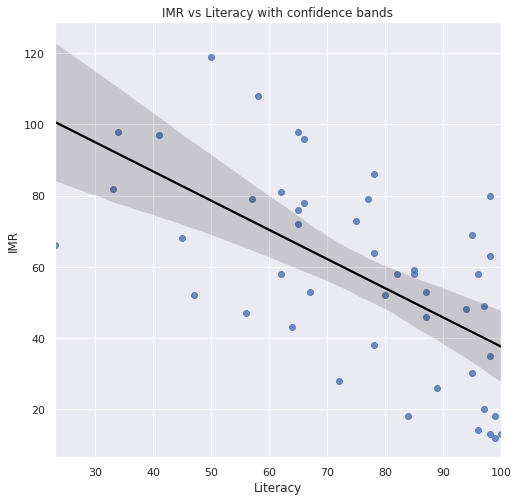

In [49]:
sns.regplot(data=africa, x="Literacy", y="IMR", line_kws={"color":"black"})
plt.title("IMR vs Literacy with confidence bands")
plt.savefig("literacy_imr_with_ci.png")

In [50]:
x = africa.Literacy.sort_values(ignore_index=True)
endpts = africa_fit.get_prediction(x).summary_frame()

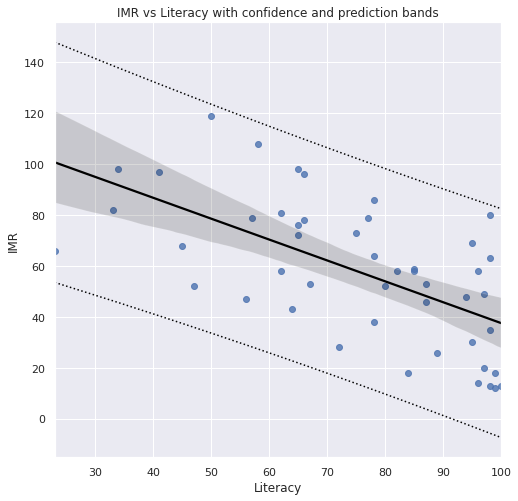

In [51]:
sns.regplot(data=africa, x="Literacy", y="IMR", line_kws={"color":"black"})
plt.plot(x, endpts.obs_ci_upper, ':', color="black")
plt.plot(x, endpts.obs_ci_lower, ':', color="black")
plt.title("IMR vs Literacy with confidence and prediction bands")
plt.savefig("literacy_imr_ci_preds.png")